# Tarea 1 - Métodos Lineales para Regresión

## 1. Regresión Lineal Ordinaria (LSS) 

# a)

La línea número 4 se realiza para sacar del dataset las columnas con la información de id, date (fecha) y zipcode. Esto dado a que no entrega ninguna información para el estudio que se quiere realizar, que es predecir el precio de una casa.

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("kc_house_data.csv")
df.drop(['id','date','zipcode',],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


## b)

El dataset a utilizar corresponde a los atributos de una casa y el precio de cada una. Esto servirá para entrenar el modelo y poder predecir el precio de una casa con estos mismos atributos.

In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


## c)

La normalización que se realiza en la tercera línea del siguiente código a todos los datos es debido a que es más sencillo trabajar cuando todos tienen una escala en común. La transformación a la variable **price** aplicando el logaritmo es para diferenciarla de las otras variables. Además quedan números reales mayores a cero lo que facilita el análisis que corresponderá al output de la regresión lineal.

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['price'] = np.log(df['price'])

## d)

El modelo lineal, dado un vector de atributos $X^T = (X_{1}, X_{2},...,X_{p})$, es posible predecir $Y$ gracias al modelo:

$$\hat{Y} = \hat{\beta_{0}} + \displaystyle\sum_{j=1}^{p} X_j \hat{\beta_j}$$

Por lo que, la conveniencia de la línea 4 es agregar a todos los vectores de atributos $ X $, un nuevo valor (atributo) $x_{0} = 1$, así se puede eliminar el intercepto con el eje $y$ de la función de regresión y se agrega al vector de coeficientes $\boldsymbol{\beta}$ como $\beta_{0}$, así el modelo queda simplemente:

$$\hat{Y} = X^T \hat{\beta}$$

Por lo tanto, es fácil notar que los argumentos que necesita la función es un vector $X$ con los atributos de la casa a estudiar y los coeficientes $\boldsymbol{\beta}$ que se obtienen a través de la técnica de los mínimos cuadrados.

In [5]:
import sklearn.linear_model as lm
X = df_scaled.iloc[:,1:] #use .ix instead, in older pandas version
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['price']
#mascara estatica con el 70% de los datos
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara== 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

## e)

Los Z-scores miden el efecto de sacar una variable del modelo. Si se toma el 5% nivel de significancia, podemos observar que ni un valor es mayor a 2 en valor absoluto, con lo que se podría concluir que ni una variable es relevante.

In [6]:
# Primer método solo utilizando zscore como coeficientes/desviacion estandar
Betas = linreg.coef_ #Coeficientes
Xstd = Xtrain.std() #Desviacion Estandar
z1 = Betas/Xstd # Z-Score = Coeficientes/Desviacion Estandar
print z1

# Segundo método. Hay que poner valor absoluto o si no, no funciona.
xtx =(Xtrain.transpose().dot(Xtrain))
xtx_inv = pd.DataFrame(np.linalg.pinv(xtx.values), xtx.columns, xtx.index)
sxtx_inv = np.sqrt(np.abs(xtx_inv))
z2 = (linreg.coef_)/(Xtrain.std().dot(sxtx_inv))

print "-------------------"
print z2

bedrooms        -0.008458
bathrooms        0.056819
sqft_living      0.058571
sqft_lot         0.021468
floors           0.039806
waterfront       0.033687
view             0.041575
condition        0.044218
grade            0.187856
sqft_above       0.048391
sqft_basement    0.031162
yr_built        -0.115237
yr_renovated     0.014344
lat              0.184683
long            -0.004128
sqft_living15    0.087478
sqft_lot15      -0.006879
intercept             inf
dtype: float64
-------------------
bedrooms          -0.142453
bathrooms          0.724099
sqft_living        0.800707
sqft_lot           0.455970
floors             0.566605
waterfront         0.927581
view               0.837532
condition          1.079168
grade              2.336180
sqft_above         0.605468
sqft_basement      0.533302
yr_built          -1.420872
yr_renovated       0.348213
lat                4.028189
long              -0.070344
sqft_living15      1.193337
sqft_lot15        -0.138728
intercept        760.

## 2. Selección de atributos

## a)

Forwardstepwise
selection starts with the intercept, and then sequentially adds into
the model the predictor that most improves the fit. Forward-stepwise selection is a greedy algorithm

[16, 11, 4, 15, 14, 9, 8, 12, 0, 7, 6, 2, 1, 3, 5, 13, 10]
[16, 11, 4, 14, 12, 13, 1, 5, 15, 9, 6, 8, 7, 0, 2, 3, 10]


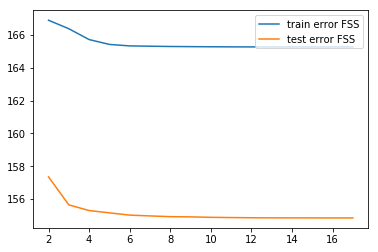

In [31]:
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

Xmt = Xtest.as_matrix()
ymt = ytest.as_matrix()

def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    variables = []
    selected = [p]
    current_score = best_new_score = 0.0
    mse = []
    while remaining and len(selected)<=k :
        score_candidates = []
        score_candidates_test = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        #print "selected = %s ..."%names_x[best_candidate]
        #print "totalvars=%d, mse = %f"%(len(indexes), best_new_score)
        mse.append(best_new_score) # Necessary to plot train error
        variables.append(len(indexes))        
    
    print selected
    return variables, mse

names_regressors = X.columns[:-1] #without intercept

variables1, mse_train = fss(Xm,ym,names_regressors)
variables2, mse_test = fss(Xmt, ymt,names_regressors)

ax = plt.gca()
ax.plot(variables1,mse_train,label='train error FSS')
ax.plot(variables2,mse_test,label='test error FSS')
plt.legend(loc=1)
plt.show()

## 3. Regularización

## a)

El método de Ridge Regression busca disminuir los coeficientes de la regresión imponiendo una penalidad $\lambda$ por su tamaño. Es por esto que la solución de la regresión Ridge estará dada por: 

$$\hat{\beta} = (X^T X + \lambda I)^{-1}X^Ty$$

Es por esto que entre mayor sea la penalidad $\lambda$ más se reducirán los coeficientes:
$$\lambda \to 0, \hat{\beta}^{Ridge} \to \hat{\beta}^{OLS}$$
$$\lambda \to \infty, \hat{\beta}^{Ridge} \to 0$$

Esto se puede ver en el gráfico del siguiente código, cuando la penalidad $\lambda$ es un número grande, en este caso $10^7$, las variables tienden a converger a cero (disminuyen). Mientras que cuando $\lambda$ tiene un valor menor, en este caso una penalidad de $10$, las variables siguen estando dispersas tal como en la regresión lineal ordinaria.

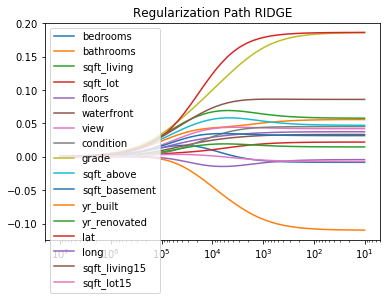

In [8]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
X2 = X.drop('intercept', axis=1,inplace=False)
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

## b)

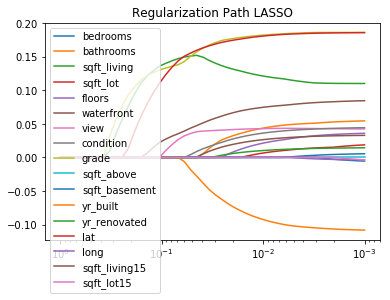

In [9]:
from sklearn.linear_model import Lasso
import matplotlib.pylab as plt
X2 = X.drop('intercept', axis=1,inplace=False)
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path LASSO')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

## c)

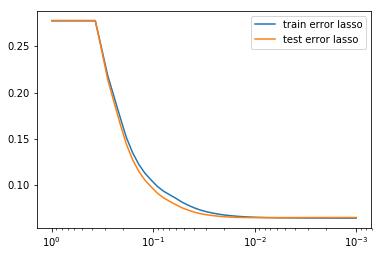

In [27]:
Xtest = X2[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error lasso')
ax.plot(alphas_,mse_test,label='test error lasso')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

## d)

In [33]:
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
best_cv_mse = float("inf")
model = Lasso(fit_intercept=True)
alphas_ = np.logspace(0,-3,base=10)
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
        for train, val in kf.split(Xm)]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print "BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

BEST PARAMETER=1.000000, MSE(CV)=0.277498
BEST PARAMETER=0.323746, MSE(CV)=0.248552
BEST PARAMETER=0.281177, MSE(CV)=0.218688
BEST PARAMETER=0.244205, MSE(CV)=0.196162
BEST PARAMETER=0.212095, MSE(CV)=0.173554
BEST PARAMETER=0.184207, MSE(CV)=0.151799
BEST PARAMETER=0.159986, MSE(CV)=0.135389
BEST PARAMETER=0.138950, MSE(CV)=0.122715
BEST PARAMETER=0.120679, MSE(CV)=0.113007
BEST PARAMETER=0.104811, MSE(CV)=0.105611
BEST PARAMETER=0.091030, MSE(CV)=0.098822
BEST PARAMETER=0.079060, MSE(CV)=0.093648
BEST PARAMETER=0.068665, MSE(CV)=0.089745
BEST PARAMETER=0.059636, MSE(CV)=0.085907
BEST PARAMETER=0.051795, MSE(CV)=0.081724
BEST PARAMETER=0.044984, MSE(CV)=0.078441
BEST PARAMETER=0.039069, MSE(CV)=0.075561
BEST PARAMETER=0.033932, MSE(CV)=0.073192
BEST PARAMETER=0.029471, MSE(CV)=0.071383
BEST PARAMETER=0.025595, MSE(CV)=0.069968
BEST PARAMETER=0.022230, MSE(CV)=0.068753
BEST PARAMETER=0.019307, MSE(CV)=0.067832
BEST PARAMETER=0.016768, MSE(CV)=0.067134
BEST PARAMETER=0.014563, MSE(CV)=0